# <font color='#5BA69E'>RAPPEL DE NOS OBJECTIFS</font> ##

# <font color='#5BA69E'>BIBLIOTHEQUES PYTHON</font> ##

In [1]:
# ------------Bibliotheque de base

import pandas as pd
import numpy as np

#-----------------visualisations

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() ## Exécuter pour activer le thème par défaut de Seaborn


#------------statistiques et correlation
from scipy.stats import pearsonr,spearmanr,kendalltau # calcul de correlation
from sklearn.preprocessing import StandardScaler,MinMaxScaler # standardisation,normalisation

import statsmodels.api as sm 
from statsmodels.formula.api import ols # pour le stat ANOVA

#------------modélisation : général

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics

# -------------modélisation : modéles

# modèles standards
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import linear_model

# modèles de classification de bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


# modèles de classification de boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# modèles de classification de stacking
from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import StackingClassifier

# -----------modélisation : performance

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report




# <font color='#5BA69E'>PARAMETRES D'AFFICHAGE PANDAS</font> ##

In [2]:
# suppression des limites de taille
pd.set_option('display.max_columns', None) # aucune limite sur le nombre de colonnes affichées
pd.set_option('display.max_colwidth', None)  # aucune limite sur le texte intra colonne
# pd.set_option('display.max_rows', None)  # Aucune limite de lignes

#suppression des warnings
import warnings
warnings.filterwarnings('ignore')

# <font color='#5BA69E'>CHARTE GRAPHIQUE</font> ##

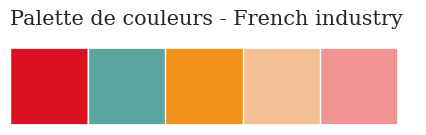

In [3]:
# Définition de la charte graphique

sns.palplot(["#D91122", "#5BA69E", "#F2911B", "#F2C094", "#F29494"])
plt.title("Palette de couleurs - French industry  ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [4]:
# création d'une colormap personnalisée

from matplotlib.colors import ListedColormap

french_indus = ["#D91122", "#5BA69E", "#F2911B", "#F2C094", "#F29494"]
French_industry = ListedColormap(sns.color_palette(french_indus))



# <font color='#5BA69E'>JEUX DE DONNEES</font> ##

### <font color='#F2911B'> DESCRIPTION DES VARIABLES INSEE</font>

In [5]:
# Dataset décrivant et catégorisant les variables Insee

meta_dossier_complet=pd.read_excel("meta_dossier_complet.xlsx")

# Dans ce dataset trois colonnes seront exploitées : 

col_meta_dossier_complet=['COD_VAR','LIB_VAR_LONG','THEME']

# un jeu de données simplifié est créé 

Variables_Insee=meta_dossier_complet[col_meta_dossier_complet] # selection des colonnes

Variables_Insee=Variables_Insee[Variables_Insee.COD_VAR!='CODGEO'] # suppression des CODGEO

# simplification des intitulés 'Theme'

Theme_simplification={'Evolution et structure de la population' : 'Population',
 'Couples - Familles - Ménages' : 'Famille', 
 'Diplômes - Formation' : 'Formation',
'Population active, emploi et chômage au sens du recensement':'Emploi',
"Caractéristiques de l'emploi au sens du recensement":'Emploi',
'Naissances et décès domiciliés':'Population',
'Revenus et pauvreté des ménages':'Revenus',
"Salaires et revenus d'activité":'Revenus',
'Caractéristiques des établissements':'Entreprise',
'Démographie des entreprises' : 'Entreprise',
}

Variables_Insee.THEME=Variables_Insee.THEME.replace(Theme_simplification)

# Pour simplifier notre traitement, la variable TP6020 aura un theme spécifique : 'Variable cible'

Variables_Insee.loc[Variables_Insee['COD_VAR'] == 'TP6020', 'THEME'] = Variables_Insee.loc[Variables_Insee['COD_VAR'] == 'TP6020', 'THEME'].replace('Revenus', 'Variable cible')

print('les nouveaux thèmes :',Variables_Insee.THEME.unique())


les nouveaux thèmes : ['Population' 'Famille' 'Logement' 'Formation' 'Emploi' 'Revenus'
 'Variable cible' 'Entreprise' 'Tourisme']


### <font color='#F2911B'>DONNEES INSEE 2020</font>

In [6]:
#----------------------------------------création d'un Dataset all variables-----------------------------#

all_content_2020_v4= pd.read_csv("all_content_2020_v4.csv",encoding= "utf-8-sig",index_col='CODGEO', dtype = {'CODGEO' : 'str'},na_values=['s','nd'])


# Le dataset pauvrete_2020_all_v05 ne contient que 4274 entrées.
# il ne sera pas utilisé pour l'étude de la MED20


#-------------------------------------------nettoyage du jeu de données-----------------------------------#

# suppression des virgules

all_content_2020_v4_str=all_content_2020_v4.select_dtypes(include='object') # dataframe string
all_content_2020_v4_str=all_content_2020_v4_str.apply(lambda row : row.str.replace(',','.')) # remplacement des virgules par des points
all_content_2020_v4_nostr=all_content_2020_v4.select_dtypes(include=['float','int']) # dataframe no string
all_content_2020=pd.concat([all_content_2020_v4_str,all_content_2020_v4_nostr],axis=1) # 


# transformation en float 

variables_a_floater=['PIMP20', 'TP6020', 'TP60AGE120', 'TP60AGE220', 'TP60AGE320',
       'TP60AGE420', 'TP60AGE520', 'TP60AGE620', 'TP60TOL120', 'TP60TOL220',
       'PACT20', 'PTSA20', 'PCHO20', 'PBEN20', 'PPEN20', 'PPAT20', 'PPSOC20',
       'PPFAM20', 'PPMINI20', 'PPLOGT20', 'PIMPOT20', 'RD20']

all_content_2020[variables_a_floater]=all_content_2020[variables_a_floater].astype(float)


# identification des variables Insee

variables_conservees=[]

for i in Variables_Insee.COD_VAR :
    
    if i in all_content_2020_v4.columns :
        variables_conservees.append(i)
    
#-------------------------------------------création d'un dataframe contenant que les variables insee-----------------------------------#

df=all_content_2020[variables_conservees]

Le datafame df contient exclusivement des variables Insee. 
Toutes les variables Insee sont float ou int
La seule variable objet, à savoir la variable CODGEO, a été utilisée pour l'index.

### <font color='#F2911B'>CREATION D'UN DATAFRAME TP6020</font>


In [7]:
dfTP6020=df.dropna(axis=0,subset=['TP6020'])
dfTP6020.shape

(4325, 723)

### <font color='#F2911B'>DONNEES GEOGRAPHIQUES</font>

In [9]:
geo_2020_pauvrete_v4=pd.read_csv('geo_2020_pauvrete_v4.csv')
df_geo=geo_2020_pauvrete_v4


# <font color='#5BA69E'>SELECTION DES VARIABLES</font> ##

### <font color='#F2911B'>LE TAUX DE COMPLETUDE DES VARIABLES EXPLICATIVES</font>


In [10]:
####----------------------création d'un dataframe contenant les taux de complétude--------------------####

Variables,Taux_complétude,Theme_variables=[],[],[]

for i in dfTP6020.columns :
    
    Variables.append(i)
    
    taux=round((((dfTP6020.shape[0]-dfTP6020[i].isna().sum())/dfTP6020.shape[0])*100),1)
    Taux_complétude.append(taux)
    
    Theme=Variables_Insee[Variables_Insee.COD_VAR==i].THEME.values[0]
    Theme_variables.append(Theme)
    

df_completude=pd.DataFrame({'Variables':Variables,'Taux_complétude':Taux_complétude,'Thème_Variable':Theme_variables})


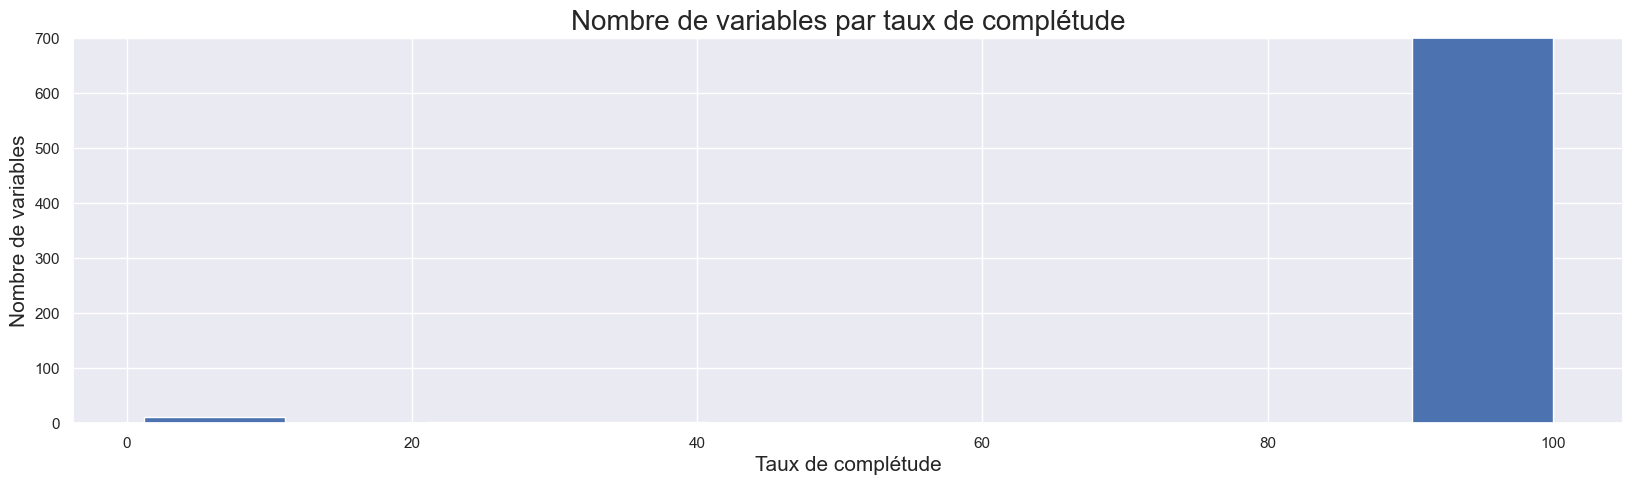

In [11]:
plt.figure(figsize=(20,5))
plt.hist(df_completude.Taux_complétude);
plt.ylabel('Nombre de variables',fontsize=15)
plt.ylim(0,700);
plt.xlabel('Taux de complétude',fontsize=15)
plt.title('Nombre de variables par taux de complétude',fontsize=20);


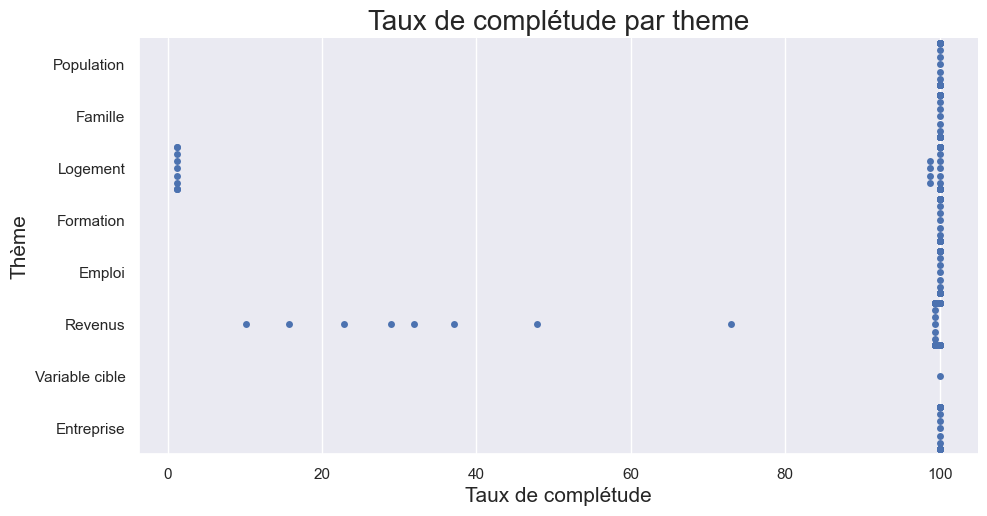

In [12]:
sns.catplot(data=df_completude, y='Thème_Variable',x='Taux_complétude',kind ='swarm',height=5,aspect=2)
plt.ylabel('Thème',fontsize=15)
plt.xlabel('Taux de complétude',fontsize=15)
plt.title('Taux de complétude par theme',fontsize=20);

In [13]:
df_completude[df_completude.Taux_complétude<20].sort_values(by='Taux_complétude',ascending=True).head(20)

,Variables,Taux_complétude,Thème_Variable
250,P19_RP_ELEC,1.2,Logement
251,P19_RP_EAUCH,1.2,Logement
252,P19_RP_BDWC,1.2,Logement
253,P19_RP_CHOS,1.2,Logement
254,P19_RP_CLIM,1.2,Logement
255,P19_RP_TTEGOU,1.2,Logement
260,P19_RP_HABFOR,1.2,Logement
261,P19_RP_CASE,1.2,Logement
262,P19_RP_MIBOIS,1.2,Logement
263,P19_RP_MIDUR,1.2,Logement


### <font color='#F2911B'>CORRELATION DES VARIABLES TRAITANT DU REVENU</font>

In [14]:
# description des variables concernées 

Variables_Insee[Variables_Insee.THEME=="Revenus"]

,COD_VAR,LIB_VAR_LONG,THEME
1555,NBMENFISC20,Nombre de ménages fiscaux,Revenus
1556,NBPERSMENFISC20,Nombre de personnes dans les ménages fiscaux,Revenus
1557,MED20,Médiane du niveau de vie (€),Revenus
1558,PIMP20,Part des ménages fiscaux imposés (%),Revenus
1560,TP60AGE120,Taux de pauvreté des personnes dans les ménages dont le référent fiscal a moins de 30 ans (%),Revenus
1561,TP60AGE220,Taux de pauvreté des personnes dans les ménages dont le référent fiscal a de 30 à 39 ans (%),Revenus
1562,TP60AGE320,Taux de pauvreté des personnes dans les ménages dont le référent fiscal a de 40 à 49 ans (%),Revenus
1563,TP60AGE420,Taux de pauvreté des personnes dans les ménages dont le référent fiscal a de 50 à 59 ans (%),Revenus
1564,TP60AGE520,Taux de pauvreté des personnes dans les ménages dont le référent fiscal a de 60 à 74 ans (%),Revenus
1565,TP60AGE620,Taux de pauvreté des personnes dans les ménages dont le référent fiscal a 75 ans ou plus (%),Revenus


In [15]:
# Correlation  : création d'un dataframe dédié

dfTP6020_coor_revenus=pd.concat(
[dfTP6020[Variables_Insee[Variables_Insee.THEME=='Revenus'].COD_VAR.values], # df avec les variables explicatives revenus
 dfTP6020[Variables_Insee[Variables_Insee.THEME=='Variable cible'].COD_VAR.values]],# df avec la variable cible (MED20)
 axis=1)  

print(dfTP6020_coor_revenus) # point de véfirication


        NBMENFISC20  NBPERSMENFISC20    MED20  PIMP20  TP60AGE120  TP60AGE220  \
CODGEO                                                                          
01004        6882.0          15358.0  21070.0    48.0        24.0        22.0   
01007        1192.0           2888.0  24330.0    57.0         NaN         NaN   
01014        1375.0           3523.0  21670.0    49.0         NaN         NaN   
01025        1610.0           4195.0  23880.0    52.0         NaN         NaN   
01031        1556.0           3461.0  20180.0    43.0         NaN         NaN   
...             ...              ...      ...     ...         ...         ...   
97420        8432.0          23712.0  17480.0    30.0        50.0        36.0   
97421        2487.0           6894.0  12960.0    15.0         NaN        59.0   
97422       30645.0          78928.0  15880.0    27.0        55.0        42.0   
97423        2461.0           6919.0  16250.0    26.0         NaN        40.0   
97424        2150.0         

In [16]:
# calcul des correlations 
Corr_revenus=dfTP6020_coor_revenus.corr()['TP6020']

# Création de dataframe

Table_corr_revenus=pd.DataFrame({'Taux_corr':Corr_revenus})
Table_corr_revenus['Taux_corr_abs']=Table_corr_revenus.Taux_corr.apply(lambda x : abs(x)) # ajout d'une colonne avec la valeur absolue du taux

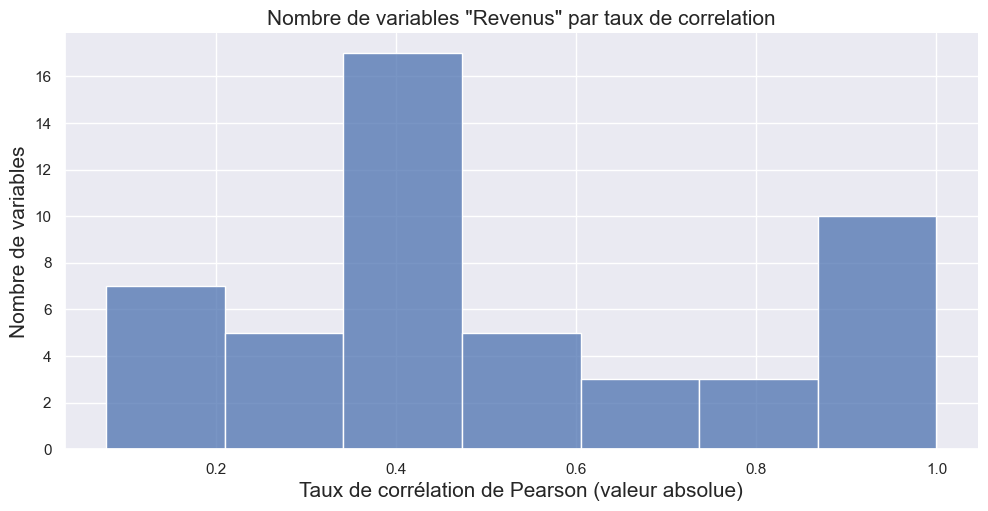

In [17]:
# analyse de la table de correlation

sns.displot(Table_corr_revenus[Table_corr_revenus.index!='MED20'].Taux_corr_abs,height=5,aspect=2)
plt.ylabel('Nombre de variables',fontsize=15)
plt.xlabel('Taux de corrélation de Pearson (valeur absolue)',fontsize=15)
plt.title('Nombre de variables "Revenus" par taux de correlation',fontsize=15);

### <font color='#F2911B'>CORRELATION DES AUTRES VARIABLES</font>

<font color='#F2911B'><u>PREMIERE ANALYSE</u></font>

In [18]:
# création d'un dataframe dédié avec les variables renseignées
df_f=dfTP6020[df_completude[(df_completude['Thème_Variable']!='Revenus') # les variables traitant du revenu sont supprimées
                      &(df_completude['Taux_complétude']>5)].Variables.values] # les variables faiblement renseignées sont supprimées


    
df_f.shape

(4325, 663)

In [19]:
# suppression des 204 Nan
df_f=df_f.dropna()

print('nombre de nan :',df_f.isna().sum().sum()) # vérification
print('shape:',df_f.shape) # point de controle

nombre de nan : 0
shape: (4274, 663)


In [20]:
# calcul des correlations 
Corr=df_f.corr()['TP6020']

# Création de dataframe
Table_corr=pd.DataFrame({'Taux_corr':Corr}) # création du df
Table_corr['Taux_corr_abs']=Table_corr.Taux_corr.apply(lambda x : abs(x)) # ajout d'une colonne avec la valeur absolue du taux

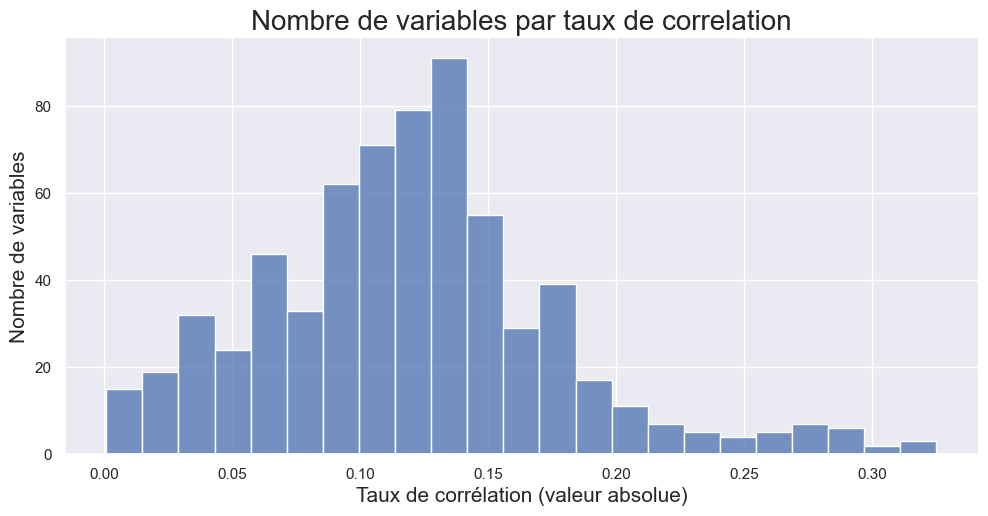

In [21]:
# analyse de la table de correlation

sns.displot(Table_corr[Table_corr.index!='TP6020'].Taux_corr_abs,height=5,aspect=2)
plt.ylabel('Nombre de variables',fontsize=15)
plt.xlabel('Taux de corrélation (valeur absolue)',fontsize=15)
plt.title('Nombre de variables par taux de correlation',fontsize=20);

 <font color='#F2911B'><u>CALCUL DES CORRELATIONS</u></font>

In [22]:

corrs_pearson,corrs_pearson_abs,p_values_pearson=[],[],[]
corrs_spearman,corrs_spearman_abs,p_values_spearman=[],[],[]
corrs_kendalltau,corrs_kendalltau_abs,p_values_kendalltau=[],[],[]

index_synthese_corr=[]

for row in df_f.columns :
    #-------------correlation de pearson
    corr_pearson,p_value_pearson=pearsonr(df_f.TP6020,df_f[row])
        
    corrs_pearson.append(corr_pearson)
    corrs_pearson_abs.append(abs(corr_pearson))
    p_values_pearson.append(p_value_pearson)
        
    #------------correlation de spearman
    corr_spearman,p_value_spearman=spearmanr(df_f.TP6020,df_f[row])
        
    corrs_spearman.append(corr_spearman)
    corrs_spearman_abs.append(abs(corr_spearman))
    p_values_spearman.append(p_value_spearman)
        
    #--------------------correlation kendalltau
        
    corr_kendalltau,p_value_kendalltau=kendalltau(df_f.TP6020,df_f[row])
       
    corrs_kendalltau.append(corr_kendalltau)
    corrs_kendalltau_abs.append(abs(corr_kendalltau))
    p_values_kendalltau.append(p_value_kendalltau)  
        

In [23]:
# création d'un tableau de données 'taux de correlation' pour analyse et visualisation

corr_pearson=pd.DataFrame({
    'Méthode' :'Pearson',
    'COD_VAR':df_f.columns,
    'corr_abs':corrs_pearson_abs,
    'p_value':p_values_pearson})  # création d'un df pearson

corr_spearman=pd.DataFrame({
    'Méthode' :'Spearman',
    'COD_VAR':df_f.columns,
    'corr_abs' :  corrs_spearman_abs,
    'p_value':p_values_spearman }) # création d'un df spearman

corr_kendalltau=pd.DataFrame({
    'Méthode' :'Kendalltau',
    'COD_VAR':df_f.columns,
    'corr_abs': corrs_kendalltau_abs,
    'p_value':p_values_kendalltau}) # création d'un df kendalltau

synthese_corr=pd.concat([corr_pearson,corr_spearman,corr_kendalltau],axis=0) # merge axis 0 des trois df
synthese_corr=synthese_corr.merge(right=Variables_Insee,on='COD_VAR',how='left') # ajout de la colonne theme


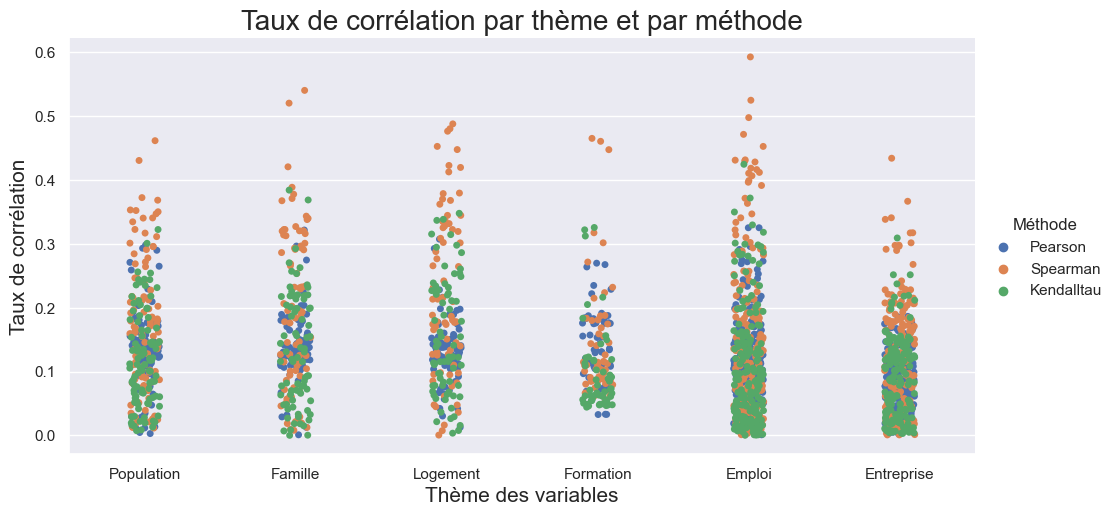

In [24]:
# Visualisation et analyse des taux de corrélation

data_not_TP6020=synthese_corr[synthese_corr.COD_VAR!='TP6020'] # filtre de la MED20

sns.catplot(y='corr_abs',x='THEME',data=data_not_TP6020,height=5,aspect=2,hue='Méthode'); # dataviz
plt.ylabel('Taux de corrélation',fontsize=15)
plt.xlabel('Thème des variables',fontsize=15)
plt.title('Taux de corrélation par thème et par méthode',fontsize=20);


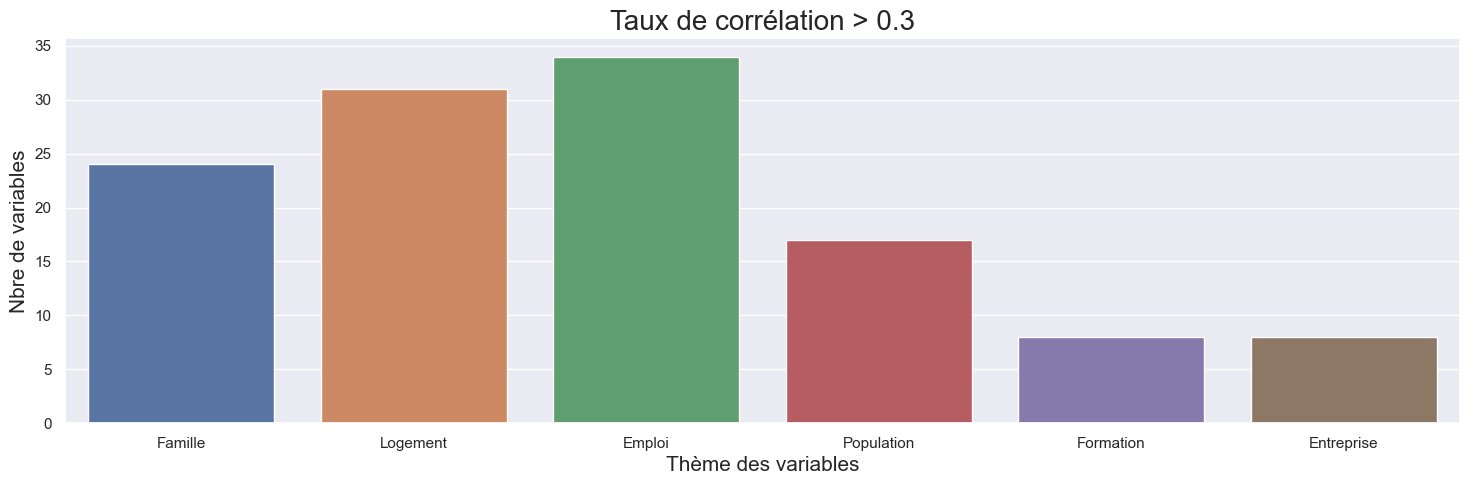

In [25]:
plt.figure(figsize=(18,5))
sns.countplot(x='THEME',data=data_not_TP6020[data_not_TP6020.corr_abs>0.3]); # dataviz
plt.ylabel('Nbre de variables',fontsize=15)
plt.xlabel('Thème des variables',fontsize=15)
plt.title('Taux de corrélation > 0.3',fontsize=20);


In [30]:
data_not_TP6020[data_not_TP6020.corr_abs>0.3].count()


Méthode         122
COD_VAR         122
corr_abs        122
p_value         122
LIB_VAR_LONG    122
THEME           122
dtype: int64

<font color='#F2911B'><u>SELECTION DES VARIABLES "POPULATION"</u></font>

In [26]:
synthese_corr.iloc[:,1:][(synthese_corr.corr_abs>0.3)&
              (synthese_corr.THEME=='Population')           
             ].sort_values(by='corr_abs',ascending=False).head(40)

,COD_VAR,corr_abs,p_value,LIB_VAR_LONG,THEME
754,C19_POP2554_CS8,0.461666,1.159076e-224,Nombre de personnes de 25 à 54 ans Autres sans activité professionnelle en 2019,Population
763,C19_POP55P_CS8,0.430653,1.442546e-192,Nombre de personnes de 55 ans ou plus Autres sans activité professionnelle en 2019,Population
702,P19_POP1524_IRAN2,0.372475,9.214305e-141,Nombre de personnes de 15 à 24 ans habitant 1 an auparavant un autre logement de la màªme commune en 2019,Population
708,P19_POP55P_IRAN2,0.368437,1.534422e-137,Nombre de personnes de 55 ans ou plus habitant 1 an auparavant un autre logement de la màªme commune en 2019,Population
752,C19_POP2554_CS6,0.353139,9.494088e-126,Nombre de personnes de 25 à 54 ans Ouvriers en 2019,Population
761,C19_POP55P_CS6,0.352247,4.419069e-125,Nombre de personnes de 55 ans ou plus Ouvriers en 2019,Population
734,C19_F15P_CS6,0.350300,1.244638e-123,Nombre de femmes de 15 ans ou plus Ouvriers en 2019,Population
716,C19_POP15P_CS6,0.347131,2.712214e-121,Nombre de personnes de 15 ans ou plus Ouvriers en 2019,Population
686,P19_F90P,0.340645,1.363232e-116,Nombre de femmes de 90 ans ou plus en 2019,Population
725,C19_H15P_CS6,0.340385,2.093933e-116,Nombre d'hommes de 15 ans ou plus Ouvriers en 2019,Population


<font color='#F2911B'><u>SELECTION DES VARIABLES "FAMILLE"</u></font>

In [30]:
synthese_corr.iloc[:,1:][(synthese_corr.corr_abs>0.3)&
              (synthese_corr.THEME=='Famille')           
             ].sort_values(by='corr_abs',ascending=False).head()

,COD_VAR,corr_abs,p_value,LIB_VAR_LONG,THEME
832,C19_PMEN_CS8,0.540466,0.000000e+00,Nombre de personnes des ménages dont la personne de référence est autre sans activité professionnelle en 2019,Famille
824,C19_MEN_CS8,0.520481,1.918373e-295,Nombre de ménages dont la personne de référence est autre sans activité professionnelle en 2019,Famille
804,P19_POP1519_COUPLE,0.420707,5.782939e-183,Nombre de personnes de 15 à 19 ans vivant en couple en 2019,Famille
822,C19_MEN_CS6,0.388670,3.740122e-154,Nombre de ménages dont la personne de référence est ouvrier en 2019,Famille
1495,C19_PMEN_CS8,0.384220,3.199960e-294,Nombre de personnes des ménages dont la personne de référence est autre sans activité professionnelle en 2019,Famille


<font color='#F2911B'><u>SELECTION DES VARIABLES "LOGEMENT"</u></font>

In [29]:
synthese_corr.iloc[:,1:][(synthese_corr.corr_abs>0.3)&
              (synthese_corr.THEME=='Logement')           
             ].sort_values(by='corr_abs',ascending=False).head()

,COD_VAR,corr_abs,p_value,LIB_VAR_LONG,THEME
864,P19_RP_ACH45,0.487952,1.367714e-254,Nombre de résidences principales construites de 1919 à 1945 en 2019,Logement
847,P19_LOGVAC,0.480375,1.079349e-245,Nombre de logements vacants en 2019,Logement
874,P19_RPAPPART_ACH45,0.476499,3.145583e-241,Nombre de résidences principales de type appartement construites de 1919 à 1945 en 2019,Logement
906,P19_ANEM_RP_LOC,0.452712,4.736983e-215,Ancienneté totale d'emménagement dans les résidences principales occupées par des locataires en années en 2019,Logement
875,P19_RPAPPART_ACH70,0.447733,7.878870e-210,Nombre de résidences principales de type appartement construites de 1946 à 1970 en 2019,Logement


<font color='#F2911B'><u>SELECTION DES VARIABLES "FORMATION"</u></font>

In [31]:
synthese_corr.iloc[:,1:][(synthese_corr.corr_abs>0.3)&
              (synthese_corr.THEME=='Formation')           
             ].sort_values(by='corr_abs',ascending=False).head()

,COD_VAR,corr_abs,p_value,LIB_VAR_LONG,THEME
964,P19_FNSCOL15P_DIPLMIN,0.465291,1.232837e-228,Nombre de femmes non scolarisées de 15 ans ou plus titulaires d'aucun diplôme ou au plus un CEP en 2019,Formation
948,P19_NSCOL15P_DIPLMIN,0.460661,1.435518e-223,Nombre de personnes non scolarisées de 15 ans ou plus titulaires d'aucun diplôme ou au plus un CEP en 2019,Formation
956,P19_HNSCOL15P_DIPLMIN,0.447590,1.110128e-209,Nombre de hommes non scolarisées de 15 ans ou plus titulaires d'aucun diplôme ou au plus un CEP en 2019,Formation
1627,P19_FNSCOL15P_DIPLMIN,0.325664,4.751794e-212,Nombre de femmes non scolarisées de 15 ans ou plus titulaires d'aucun diplôme ou au plus un CEP en 2019,Formation
1611,P19_NSCOL15P_DIPLMIN,0.322002,2.336958e-207,Nombre de personnes non scolarisées de 15 ans ou plus titulaires d'aucun diplôme ou au plus un CEP en 2019,Formation


<font color='#F2911B'><u>SELECTION DES VARIABLES "EMPLOI"</u></font>

In [32]:
synthese_corr.iloc[:,1:][(synthese_corr.corr_abs>0.3)&
              (synthese_corr.THEME=='Emploi')           
             ].sort_values(by='corr_abs',ascending=False).head()

,COD_VAR,corr_abs,p_value,LIB_VAR_LONG,THEME
1068,P19_CHOM_DIPLMIN,0.592885,0.000000e+00,Nombre de chômeurs de 15 ans à 64 ans titulaires d'aucun diplôme ou au plus un CEP en 2019,Emploi
1070,P19_CHOM_CAPBEP,0.525031,1.610253e-301,"Nombre de chômeurs de 15 ans à 64 ans titulaires d'un CAP, d'un BEP ou équivalent en 2019",Emploi
1069,P19_CHOM_BEPC,0.497824,1.590073e-266,"Nombre de chômeurs de 15 ans à 64 ans titulaires d'un BEPC, brevet des collèges, DNB en 2019",Emploi
1085,P19_AINACT1564,0.471564,1.260245e-235,Nombre d'autres inactifs de 15 à 64 ans en 2019,Emploi
984,P19_HSAL15P_EMPAID,0.452686,5.037059e-215,Nombre d'hommes salariés de 15 ans ou plus Emplois aidés en 2019,Emploi


<font color='#F2911B'><u>SELECTION DES VARIABLES "ENTREPRISES"</u></font>

In [33]:
synthese_corr.iloc[:,1:][(synthese_corr.corr_abs>0.3)&
              (synthese_corr.THEME=='Entreprise')           
             ].sort_values(by='corr_abs',ascending=False).head()

,COD_VAR,corr_abs,p_value,LIB_VAR_LONG,THEME
1244,ETPRESPUB20,0.434185,4.674485e-196,Etablissements actifs de la sphère présentielle du champ du domaine public fin 2020,Entreprise
1248,ETPPRESPUB20,0.366731,3.414461e-136,Nombre de postes des établissements actifs de la sphère présentielle du champ du domaine public fin 2020,Entreprise
1192,ETOQ2020,0.340889,9.121847e-117,"Etablissements actifs des services non marchands (administration publique, enseignement, santé et action sociale) de 20 à 49 salariés fin 2020",Entreprise
1227,ETPOQ2020,0.338396,5.477218e-115,"Nombre de postes des établissements actifs des services non marchands (administration publique, enseignement, santé et action sociale) de 20 à 49 salariés fin 2020",Entreprise
1206,ETPOQ20,0.317407,1.189623e-100,"Nombre de postes des établissements actifs des services non marchands (administration publique, enseignement, santé et action sociale) fin 2020",Entreprise


<font color='#F2911B'><u>SELECTION DES VARIABLES SYNTHESE</u></font>